# **Clusterización con K-means **

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.
Es un algoritmo de aprendizaje no supervisado a diferecnia de los que vimos anteriormente. Es deceir que podemos tener datos sin una etiqueta con la respuesta correcta. Simplemente tenemos datos y debemos encontrar patrones.

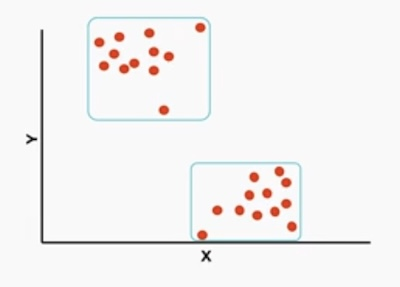

El algoritmo K-means necesita conocer cuantos grupos o cluster vamos a segmentar. A pertir de alli comienza colocando esa cantidad de puntos en forma aleatorea. Revisa los puntos que tenga cercanos calculando la distancia y se mueve un poco para intentear medir esa distancia.

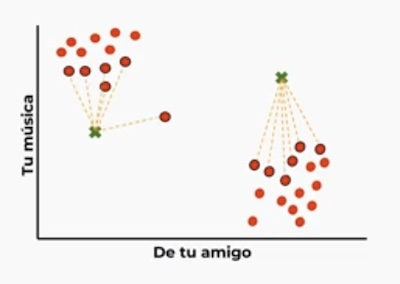

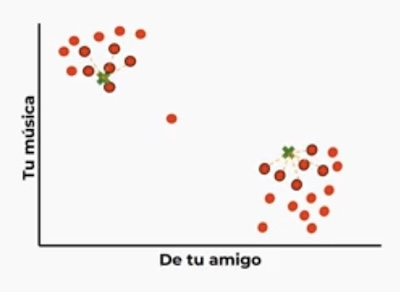

Sigue realizando este proceso por un numero limitado de iteraciones siempre intentando minimizar la distacia de los puntos a su grupo.

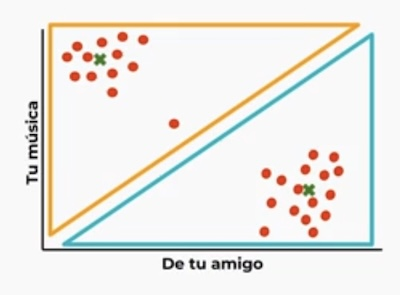

Algunos de los hiperparametros que se pueden ajustar son:

-El numero de Cluster que queremos.

-La cantidad de iteraciones.

-Cantidad de veces que correra el proceso con puntos de inicio aleatorios distintos.

Esto ultimo es para prevenir inicios que sean complejos para determinar clusters.

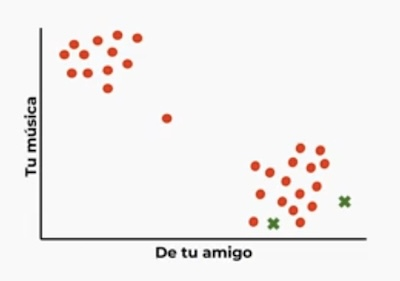

Al ser un proceso que depende de una posicion de inicio aleatorea, los resultados no siempre son los mismos, si bien en el promedio son similares.


In [19]:
import pandas as pd
datos = pd.read_csv("housing.csv")

In [20]:
#Vemos las columnas o caracteristicas de los datos. Con esto podemos decidir cual sera
#la caracteristica en la que queremos agrupar los datos.
#Ej: podemos tener en cuenta la Lat y Long para despues agrupar por ingresos o costos de la casa

datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

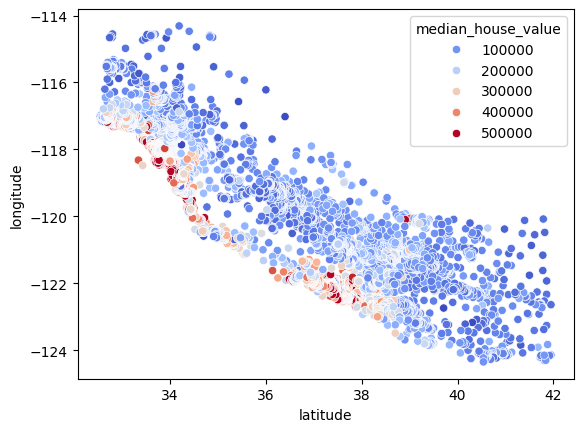

In [4]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

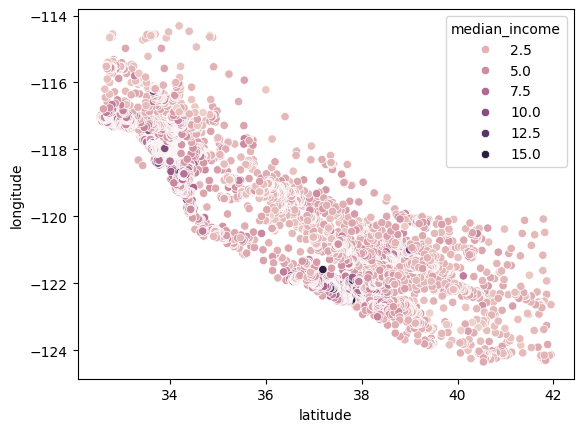

In [8]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", sizes = datos["median_income"],)

In [9]:
datos.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [10]:
from sklearn.cluster import KMeans

X = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

In [11]:
predicciones.shape

(20640,)

In [12]:
X["segmento_economico"] = predicciones

In [13]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,5
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [14]:
X["segmento_economico"].value_counts()

,count
segmento_economico,
0,6561
1,4883
4,4204
5,2764
3,1677
2,551


<Axes: xlabel='latitude', ylabel='longitude'>

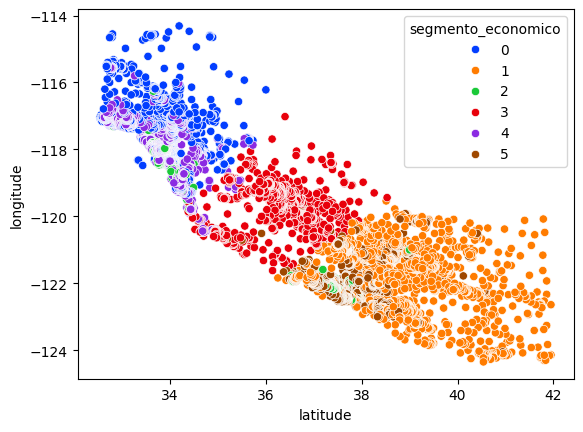

In [15]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

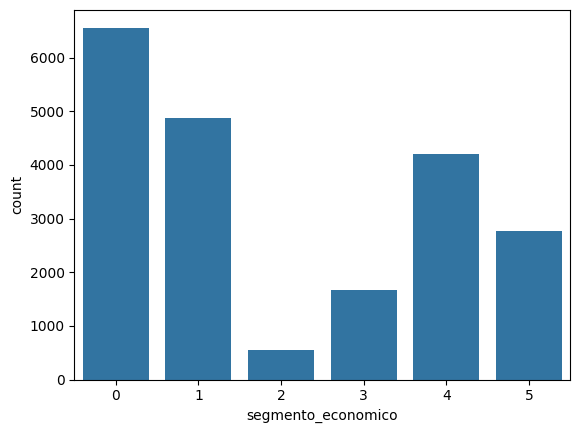

In [16]:
sb.countplot(x="segmento_economico", data=X)

In [17]:
X.groupby(["segmento_economico"])["median_income"].mean()

,median_income
segmento_economico,
0,2.788111
1,2.824459
2,10.488034
3,2.660862
4,5.303366
5,5.524420
